# Airbnb data analysis

This project work is to perfomr data analysis on the airbnb sample dataset downloaded from https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data.

## What's in the data file?

Let's first load the data file and explore what it contains.

The data file is "AB_NYC_2019.csv" and load it into a data frame, ab_nyc_df

##### Library used for data loading and cleansing: pandas

In [1]:
import pandas as pd

In [2]:
ab_nyc_df = pd.read_csv("AB_NYC_2019.csv")

In [3]:
ab_nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

From the data (above) we can see that there are 48,895 rows and 16 columns. More closely, we can see that there are columns that have missing data.

To find out the columns and number of rows, we will use "isna" and "sum" to show the results (see below).

In [4]:
ab_nyc_df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

The columns with missing data are: name, host_name, last_review and reviews_per_month.

Now let's try to understand the data held within "neighbourhood_group" and "neighbourhood".

In [5]:
ab_nyc_df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

This gives us, 5 regions within New York listings.

Let's see how these reqions are further distributed within planning areas.

In [6]:
ab_nyc_df['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [7]:
ab_nyc_df['neighbourhood'].nunique()

221

So, there are 221 further areas distrubuted within 5 reqions.

Now, lets understand the types of rooms provided by the listings.

In [8]:
ab_nyc_df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

## Cleaning the data

Now, we will clean the data as required by us for the analysis i.e. removing columns that are not required and then replacing any NaN (null) values.

Based on the analysis required, let's drop columns that are not required: id, name, host_name, last_review.

In [9]:
ab_nyc_df.drop(['id','host_name','last_review'], axis=1, inplace=True)

In [10]:
ab_nyc_df.isna().sum()

name                                 16
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Now we are left with "reviews_per_month" having NaN values. Let's replace it with 0.

In [11]:
ab_nyc_df.reviews_per_month.fillna(0, inplace=True)

In [12]:
ab_nyc_df.isna().sum()

name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

So, no missing data and we should be good to go-ahead.

## Let's Explore the Data

Now that we have the data frame as required for further exploration, we will start working on various relations within the data.

###### Libraries used for exploration and visualisation: 

matplotlib: from https://matplotlib.org/, for visualisation 

matplotlib.pyplot: from https://matplotlib.org/stable/tutorials/introductory/pyplot.html, for plotting

numpy: from https://numpy.org/, for scientific computing 

seaborn: from https://seaborn.pydata.org/, for statistical data visualisations

### How are listings distributed?

We will try to visualize and understand the listing distributions in relation to room types and average pricing.

#### Host with highest listings (Top 10)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import matplotlib.cbook as cbook

Get the total listings

In [14]:
total_listings = ab_nyc_df['host_id'].nunique()
print(total_listings)

37457


Get the top 10 listings

In [15]:
top10_total_listings = ab_nyc_df['host_id'].value_counts().head(10).sum()
print(top10_total_listings)

1270


Data held within top 10 listings

[Text(0, 0, '219517861'),
 Text(1, 0, '107434423'),
 Text(2, 0, '30283594'),
 Text(3, 0, '137358866'),
 Text(4, 0, '16098958'),
 Text(5, 0, '12243051'),
 Text(6, 0, '61391963'),
 Text(7, 0, '22541573'),
 Text(8, 0, '200380610'),
 Text(9, 0, '7503643')]

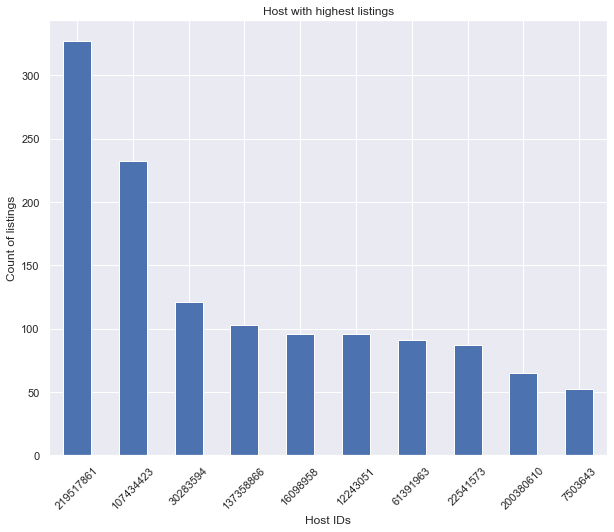

In [16]:
top_host_id = ab_nyc_df['host_id'].value_counts().head(10)
sns.set(rc={'figure.figsize':(10,8)})
viz_bar = top_host_id.plot(kind='bar')
viz_bar.set_title('Host with highest listings')
viz_bar.set_xlabel('Host IDs')
viz_bar.set_ylabel('Count of listings')
viz_bar.set_xticklabels(viz_bar.get_xticklabels(), rotation=45)

So, out of 37457 listings we can see that 1270 constitutes as top 10 of which there is a list more than 350.

#### Listings in Top Regions

Here, let's find how each region ("neighbourhood_group') is held by the listings.

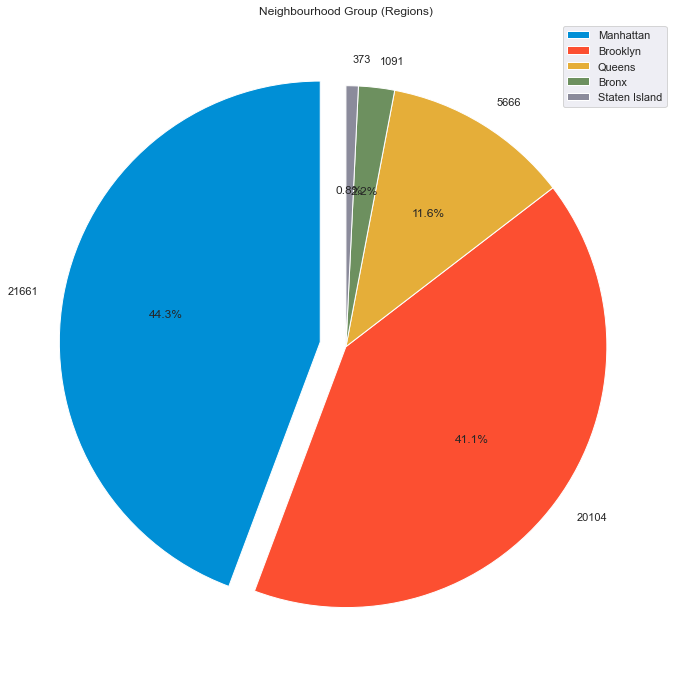

In [17]:
labels = ab_nyc_df.neighbourhood_group.value_counts().index
colors = ['#008fd6','#fc4f31','#e5ae39','#6d905f','#8b8b9b']
explode = (0.1,0,0,0,0)
shape = ab_nyc_df.neighbourhood_group.value_counts().values
plt.figure(figsize=(12,12))
plt.pie(shape, explode = explode, labels=shape, colors= colors, autopct = '%1.1f%%', startangle=90)
plt.legend(labels)
plt.title('Neighbourhood Group (Regions)')
plt.show()

The chart shows that Manhattan is the highest but Brooklyn being the next together sums for 80% of the total listings. 

#### Top 10 Planning Areas

In [18]:
ab_nyc_df.neighbourhood.value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

The data shows confers with the listing numbers as seen that 80% is covered by Manhattan and Brooklyn regions.


In [19]:
coord = ab_nyc_df.loc[:,['longitude','latitude']]
coord.describe()

longitude      latitude
count  48895.000000  48895.000000
mean     -73.952170     40.728949
std        0.046157      0.054530
min      -74.244420     40.499790
25%      -73.983070     40.690100
50%      -73.955680     40.723070
75%      -73.936275     40.763115
max      -73.712990     40.913060

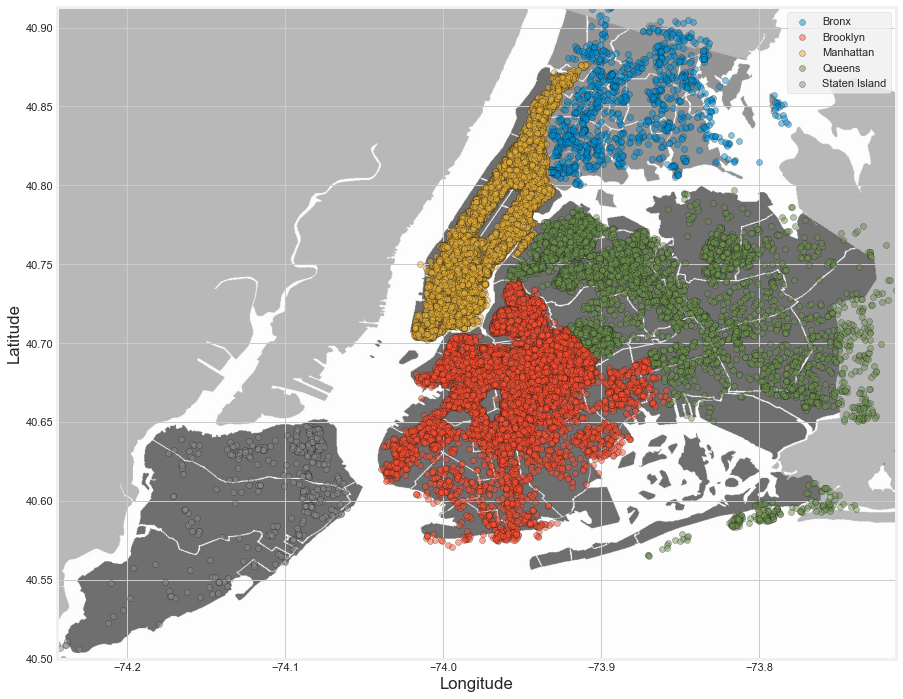

In [20]:
plt.figure(figsize=(18,12))
plt.style.use('fivethirtyeight')

# using the min and max of longitude and latitude
BBox = (-74.244420, -73.712990, 40.499790, 40.913060)

sg_map = mpimg.imread('New_York_City1.png')

plt.imshow(sg_map,zorder=0,extent=BBox)
ax = plt.gca()
groups = ab_nyc_df.groupby('neighbourhood_group')

for name,group in groups :
    plt.scatter(group['longitude'],group['latitude'],label=name,alpha=0.5, edgecolors='k')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

So, from the New York map we can see that the denser listings are shown in red (Brooklyn) followed by yellow (Manhattan). The listings decreases more towards the east and northern regions but more towards the western regions.

#### Add Price Map to the Regions and Listings

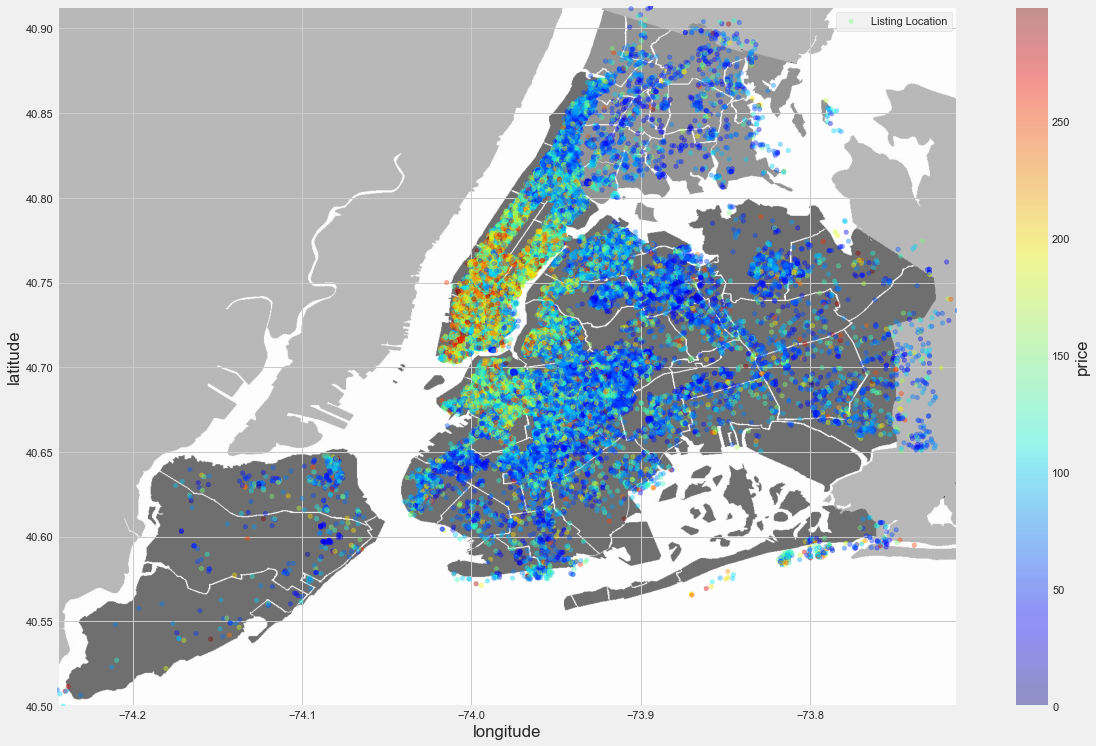

In [21]:
ab_nyc_df_1 = ab_nyc_df[ab_nyc_df.price < 300]

plt.figure(figsize=(18,12))

sg_map = mpimg.imread('New_York_City1.png')

plt.imshow(sg_map,zorder=0,extent=BBox)

ax = plt.gca()

ab_nyc_df_1.plot(kind='scatter',x='longitude',y='latitude',label='Listing Location', c='price', ax=ax, cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

plt.legend()
plt.show()

The price heatmap shows that the price goes up towards the Manhattan region and this appears to be the central region of New York.

#### Explore Price Distribution

After reviewing the price heat map, let's try to understand how the price is distributed using a box-plot. This will give us information about the price range grouped by "neighbourhood_group"/region area.

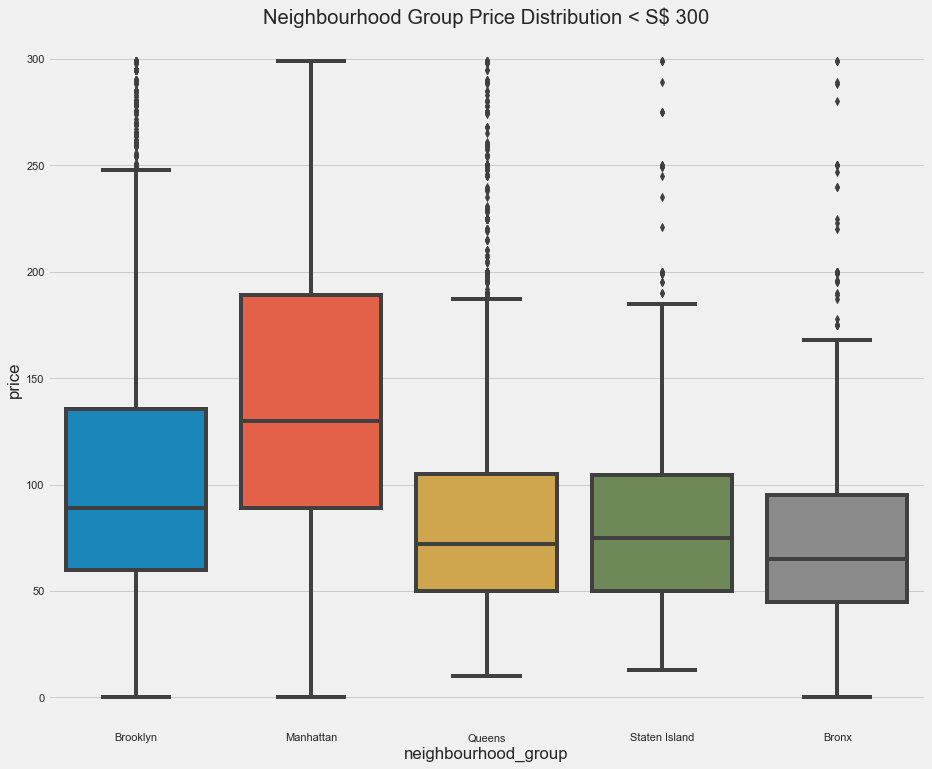

In [22]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,12))
sns.boxplot(y='price',x='neighbourhood_group',data = ab_nyc_df_1)
plt.title('Neighbourhood Group Price Distribution < S$ 300')
plt.show()

This also conforms that the Manhattan (central) regions has most expensive price per night with a median of approximately $135.

#### Top listing words that affects selling

Now, will explore the most used words in the listings that creates a relationship to the value of the property for guest lookink for properties.

In [23]:
#Crete empty list where we are going to put the name strings
names=[]

#Getting name string from 'name' column and appending it to the empty list
for name in ab_nyc_df.name:
    names.append(name)

#Setting a function to split name strings into seperate words
def split_name(name):
    s = str(name).split()
    return s

#Create empty list where we are going to count the words
names_count = []

#Getting name string to appending it to the names_count list
for n in names:
    for word in split_name(n):
        word = word.lower()
        names_count.append(word)

Now create raw data with top 25 used words

In [24]:
from collections import Counter
top_25 = Counter(names_count).most_common()
top_25 = top_25[:25]

Now visualize by putting the data in a data frame.

[Text(0, 0, 'in'),
 Text(1, 0, 'room'),
 Text(2, 0, 'bedroom'),
 Text(3, 0, 'private'),
 Text(4, 0, 'apartment'),
 Text(5, 0, 'cozy'),
 Text(6, 0, 'the'),
 Text(7, 0, 'to'),
 Text(8, 0, 'studio'),
 Text(9, 0, 'brooklyn'),
 Text(10, 0, 'apt'),
 Text(11, 0, 'spacious'),
 Text(12, 0, '1'),
 Text(13, 0, 'with'),
 Text(14, 0, '2'),
 Text(15, 0, 'of'),
 Text(16, 0, 'east'),
 Text(17, 0, 'and'),
 Text(18, 0, 'manhattan'),
 Text(19, 0, '&'),
 Text(20, 0, 'park'),
 Text(21, 0, 'sunny'),
 Text(22, 0, 'beautiful'),
 Text(23, 0, 'near'),
 Text(24, 0, 'williamsburg')]

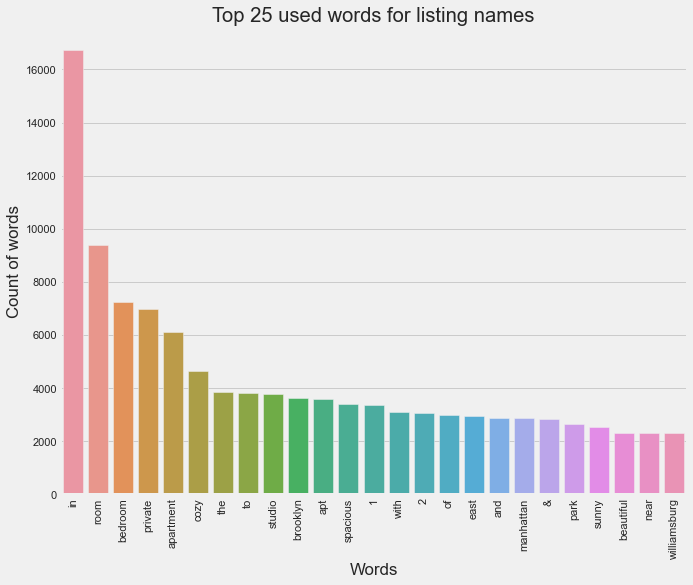

In [25]:
word_count_data = pd.DataFrame(top_25)
word_count_data.rename(columns={0:'Words',1:'Counts'},inplace=True)
viz_count = sns.barplot(x='Words',y='Counts', data = word_count_data)
viz_count.set_title('Top 25 used words for listing names')
viz_count.set_ylabel('Count of words')
viz_count.set_xlabel('Words')
viz_count.set_xticklabels(viz_count.get_xticklabels(),rotation = 90)

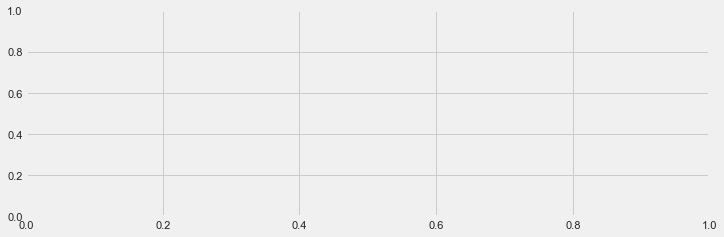

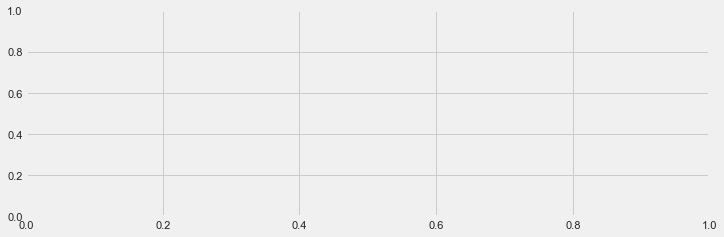

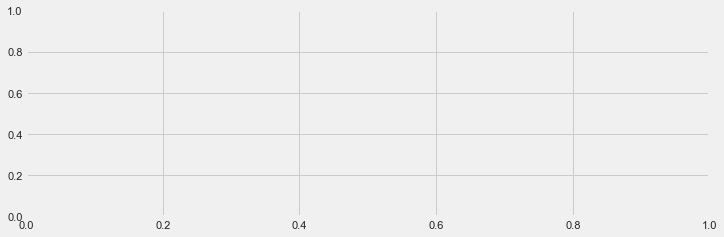

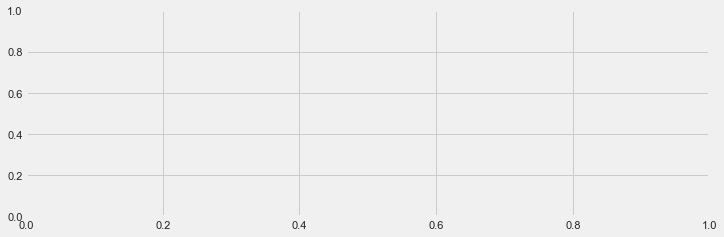

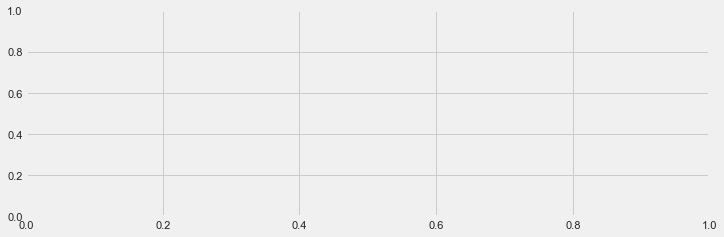

In [26]:
import plotly.offline as pyo
import plotly.graph_objs as go

#Setting up the color pallete
#'Private room', 'Entire home/apt', 'Shared room'
color_dict = {'Private room': '#cc5a49', 'Entire home/apt' : '#4586ac', 'Shared room' : '#21908d'}

#Group the room type using 'neighbourhood_group' as an index
airbnb_types=ab_nyc_df.groupby(['neighbourhood_group', 'room_type']).size()

#Create function to plot room type proportion on all region area
for region in ab_nyc_df.neighbourhood_group.unique():
    
    plt.figure(figsize=(24,12))
    
    airbnb_reg=airbnb_types[region]
    labels = airbnb_reg.index
    sizes = airbnb_reg.values
              
    colors = [color_dict[x] for x in labels]
    
    plot_num = 321
    plt.subplot(plot_num)
    reg_ch = go.Figure(data = [go.Pie(labels = labels, values = sizes, hole = 0.6)])
    reg_ch.update_traces(title = region, marker=dict(colors=colors))
    reg_ch.show()
    
    plot_num += 1

So, Brooklyn and Manhattan are the only regions that shows majority of as "Entire home/apt" with others dominated by "Private room types".

#### Top 10 most reviewed listings

Now we will find out the most reviewed properties in New York.

In [27]:
ab_nyc_df.nlargest(10, 'number_of_reviews')

name   host_id  \
11759                            Room near JFK Queen Bed  47621202   
2031                          Great Bedroom in Manhattan   4734398   
2030                      Beautiful Bedroom in Manhattan   4734398   
2015                        Private Bedroom in Manhattan   4734398   
13495                            Room Near JFK Twin Beds  47621202   
10623                  Steps away from Laguardia airport  37312959   
1879            Manhattan Lux Loft.Like.Love.Lots.Look !   2369681   
20403  Cozy Room Family Home LGA Airport NO CLEANING FEE  26432133   
4870                  Private brownstone studio Brooklyn  12949460   
471                      LG Private Room/Family Friendly    792159   

      neighbourhood_group    neighbourhood  latitude  longitude  \
11759              Queens          Jamaica  40.66730  -73.76831   
2031            Manhattan           Harlem  40.82085  -73.94025   
2030            Manhattan           Harlem  40.82124  -73.93838   
2015            Manhattan           Harlem  40.82264  -73.94041   
13495              Queens          Jamaica  40.66939  -73.76975   
10623              Queens    East Elmhurst  40.77006  -73.87683   
1879            Manhattan  Lower East Side  40.71921  -73.99116   
20403              Queens    East Elmhurst  40.76335  -73.87007   
4870             Brooklyn       Park Slope  40.67926  -73.97711   
471              Brooklyn         Bushwick  40.70283  -73.92131   

             room_type  price  minimum_nights  number_of_reviews  \
11759     Private room     47               1                629   
2031      Private room     49               1                607   
2030      Private room     49               1                597   
2015      Private room     49               1                594   
13495     Private room     47               1                576   
10623     Private room     46               1                543   
1879      Private room     99               2                540   
20403     Private room     48               1                510   
4870   Entire home/apt    160               1                488   
471       Private room     60               3                480   

       reviews_per_month  calculated_host_listings_count  availability_365  
11759              14.58                               2               333  
2031                7.75                               3               293  
2030                7.72                               3               342  
2015                7.57                               3               339  
13495              13.40                               2               173  
10623              11.59                               5               163  
1879                6.95                               1               179  
20403              16.22                               5               341  
4870                8.14                               1               269  
471                 6.70                               1                 0

Within the top 10 popular listings we see that along with Manhattan and Brooklyn, Queens also has positions. But supporting to our finding we still see that majority is still covered by Manhattan.

#### Average price per night

Let's find the average price for the listings based on top 10 reviews

In [28]:
top_review =ab_nyc_df.nlargest(10, 'number_of_reviews')
price_avg = top_review.price.mean()
print('Average price per night: ${}'.format(price_avg))

Average price per night: $65.4


This shows that there is an average price of $65 with 6/10 listings are under $60 and they are of "Private Room" type.

### EDA - Conclusion

By doing a gradual EDA on the dataset, it reveals that how the various region listings are distributed in New York along with how their spread are seen wothin different locations. It shows how Manhattan followed by Brooklyn dominates the listings and its relationship with the price in nearby regions and how this form a selling value.